Mean Absolute Error: 0.546823646524997
R² Score: 0.9847657384266951


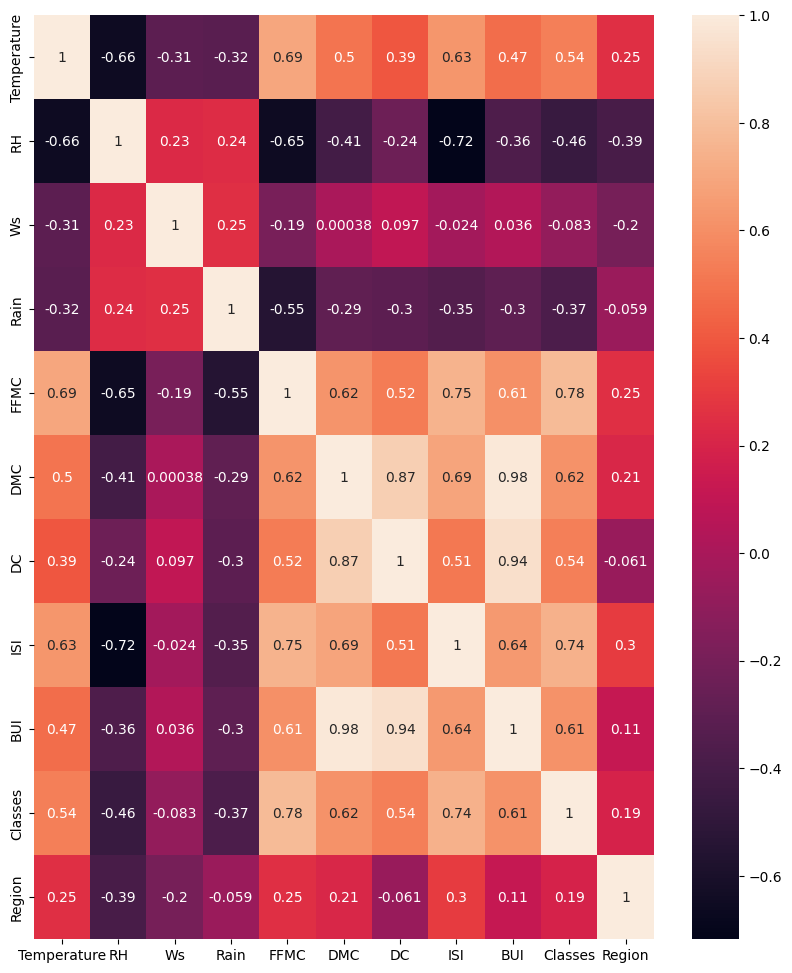

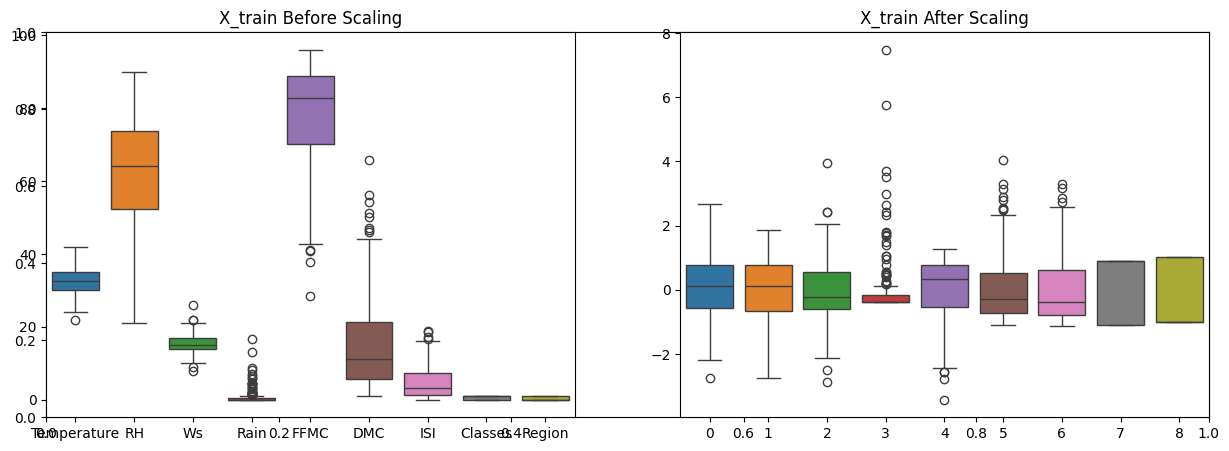

In [20]:
# 🧪 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv("Algerian_forest_fires_clean_dataset_.csv")
# Display the first 5 rows of the DataFrame to quickly inspect the structure and content
df.head()
# | day | month | year | Temperature | RH | Ws | Rain | FFMC | DMC | DC   | ISI | BUI | FWI | Classes  | Region |
# | --- | ----- | ---- | ----------- | -- | -- | ---- | ---- | --- | ---- | --- | --- | --- | -------- | ------ |
# | 1   | 6     | 2012 | 29          | 57 | 18 | 0.0  | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | not fire | 0      |
# | 2   | 6     | 2012 | 29          | 61 | 13 | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | not fire | 0      |
# | 3   | 6     | 2012 | 26          | 82 | 22 | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | not fire | 0      |
# | 4   | 6     | 2012 | 25          | 89 | 13 | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | not fire | 0      |
# | 5   | 6     | 2012 | 27          | 77 | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | not fire | 0      |

# Drop column day,month ,year
df.drop(['day','month','year'],axis=1,inplace=True)

# | Index | Temperature | RH  | Ws  | Rain | FFMC | DMC  | DC   | ISI | BUI  | FWI | Classes  | Region |
# | ----- | ----------- | --- | --- | ---- | ---- | ---- | ---- | --- | ---- | --- | -------- | ------ |
# | 0     | 29          | 57  | 18  | 0.0  | 65.7 | 3.4  | 7.6  | 1.3 | 3.4  | 0.5 | not fire | 0      |
# | 1     | 29          | 61  | 13  | 1.3  | 64.4 | 4.1  | 7.6  | 1.0 | 3.9  | 0.4 | not fire | 0      |
# | 2     | 26          | 82  | 22  | 13.1 | 47.1 | 2.5  | 7.1  | 0.3 | 2.7  | 0.1 | not fire | 0      |
# | 3     | 25          | 89  | 13  | 2.5  | 28.6 | 1.3  | 6.9  | 0.0 | 1.7  | 0.0 | not fire | 0      |
# | 4     | 27          | 77  | 16  | 0.0  | 64.8 | 3.0  | 14.2 | 1.2 | 3.9  | 0.5 | not fire | 0      |
# | ...   | ...         | ... | ... | ...  | ...  | ...  | ...  | ... | ...  | ... | ...      | ...    |
# | 238   | 30          | 65  | 14  | 0.0  | 85.4 | 16.0 | 44.5 | 4.5 | 16.9 | 6.5 | fire     | 1      |
# | 239   | 28          | 87  | 15  | 4.4  | 41.1 | 6.5  | 8.0  | 0.1 | 6.2  | 0.0 | not fire | 1      |
# | 240   | 27          | 87  | 29  | 0.5  | 45.9 | 3.5  | 7.9  | 0.4 | 3.4  | 0.2 | not fire | 1      |
# | 241   | 24          | 54  | 18  | 0.1  | 79.7 | 4.3  | 15.2 | 1.7 | 5.1  | 0.7 | not fire | 1      |
# | 242   | 24          | 64  | 15  | 0.2  | 67.3 | 3.8  | 16.5 | 1.2 | 4.8  | 0.5 | not fire | 1      |

df.head()
# | Index | Temperature | RH | Ws | Rain | FFMC | DMC | DC   | ISI | BUI | FWI | Classes  | Region |
# | ----- | ----------- | -- | -- | ---- | ---- | --- | ---- | --- | --- | --- | -------- | ------ |
# | 0     | 29          | 57 | 18 | 0.0  | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | not fire | 0      |
# | 1     | 29          | 61 | 13 | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | not fire | 0      |
# | 2     | 26          | 82 | 22 | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | not fire | 0      |
# | 3     | 25          | 89 | 13 | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | not fire | 0      |
# | 4     | 27          | 77 | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | not fire | 0      |

df['Classes'].value_counts()
# Classes
# fire        137
# not fire    106
# Name: count, dtype: int64

#Encoding 
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)
df.head()
# | Index | Temperature | RH | Ws | Rain | FFMC | DMC | DC   | ISI | BUI | FWI | Classes | Region |
# | ----- | ----------- | -- | -- | ---- | ---- | --- | ---- | --- | --- | --- | ------- | ------ |
# | 0     | 29          | 57 | 18 | 0.0  | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | 0       | 0      |
# | 1     | 29          | 61 | 13 | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | 0       | 0      |
# | 2     | 26          | 82 | 22 | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | 0       | 0      |
# | 3     | 25          | 89 | 13 | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | 0       | 0      |
# | 4     | 27          | 77 | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | 0       | 0      |
df.tail()
# | Index | Temperature | RH | Ws | Rain | FFMC | DMC  | DC   | ISI | BUI  | FWI | Classes | Region |
# | ----- | ----------- | -- | -- | ---- | ---- | ---- | ---- | --- | ---- | --- | ------- | ------ |
# | 238   | 30          | 65 | 14 | 0.0  | 85.4 | 16.0 | 44.5 | 4.5 | 16.9 | 6.5 | 1       | 1      |
# | 239   | 28          | 87 | 15 | 4.4  | 41.1 | 6.5  | 8.0  | 0.1 | 6.2  | 0.0 | 0       | 1      |
# | 240   | 27          | 87 | 29 | 0.5  | 45.9 | 3.5  | 7.9  | 0.4 | 3.4  | 0.2 | 0       | 1      |
# | 241   | 24          | 54 | 18 | 0.1  | 79.7 | 4.3  | 15.2 | 1.7 | 5.1  | 0.7 | 0       | 1      |
# | 242   | 24          | 64 | 15 | 0.2  | 67.3 | 3.8  | 16.5 | 1.2 | 4.8  | 0.5 | 0       | 1      |

df['Classes'].value_counts()
# Classes
# 1    137
# 0    106
# Name: count, dtype: int64

#divide the feature into Independent and dependent
X=df.drop('FWI',axis=1) #Independent
Y=df['FWI']             #dependent
X.head()
# | Index | Temperature | RH | Ws | Rain | FFMC | DMC | DC   | ISI | BUI | Classes | Region |
# | ----- | ----------- | -- | -- | ---- | ---- | --- | ---- | --- | --- | ------- | ------ |
# | 0     | 29          | 57 | 18 | 0.0  | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0       | 0      |
# | 1     | 29          | 61 | 13 | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0       | 0      |
# | 2     | 26          | 82 | 22 | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0       | 0      |
# | 3     | 25          | 89 | 13 | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0       | 0      |
# | 4     | 27          | 77 | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0       | 0      |
Y
# 0      0.5
# 1      0.4
# 2      0.1
# 3      0.0
# 4      0.5
#       ... 
# 238    6.5
# 239    0.0
# 240    0.2
# 241    0.7
# 242    0.5
# Name: FWI, Length: 243, dtype: float64

#Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape
# ((182, 11), (61, 11))

#Feature Selection based on correlation
X_train.corr()
# |                 | Temperature | RH     | Ws     | Rain   | FFMC   | DMC    | DC     | ISI    | BUI    | Classes | Region |
# | --------------- | ----------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------- | ------ |
# | **Temperature** | 1.000       | -0.656 | -0.306 | -0.318 | 0.695  | 0.498  | 0.391  | 0.630  | 0.474  | 0.542   | 0.255  |
# | **RH**          | -0.656      | 1.000  | 0.226  | 0.242  | -0.653 | -0.415 | -0.236 | -0.718 | -0.362 | -0.457  | -0.395 |
# | **Ws**          | -0.306      | 0.226  | 1.000  | 0.252  | -0.190 | 0.000  | 0.097  | -0.024 | 0.036  | -0.083  | -0.200 |
# | **Rain**        | -0.318      | 0.242  | 0.252  | 1.000  | -0.545 | -0.290 | -0.302 | -0.346 | -0.301 | -0.369  | -0.059 |
# | **FFMC**        | 0.695       | -0.653 | -0.190 | -0.545 | 1.000  | 0.621  | 0.524  | 0.751  | 0.607  | 0.781   | 0.250  |
# | **DMC**         | 0.498       | -0.415 | 0.000  | -0.290 | 0.621  | 1.000  | 0.869  | 0.686  | 0.983  | 0.617   | 0.213  |
# | **DC**          | 0.391       | -0.236 | 0.097  | -0.302 | 0.524  | 0.869  | 1.000  | 0.514  | 0.942  | 0.544   | -0.061 |
# | **ISI**         | 0.630       | -0.718 | -0.024 | -0.346 | 0.751  | 0.686  | 0.514  | 1.000  | 0.644  | 0.743   | 0.296  |
# | **BUI**         | 0.474       | -0.362 | 0.036  | -0.301 | 0.607  | 0.983  | 0.942  | 0.644  | 1.000  | 0.612   | 0.115  |
# | **Classes**     | 0.542       | -0.457 | -0.083 | -0.369 | 0.781  | 0.617  | 0.544  | 0.743  | 0.612  | 1.000   | 0.189  |
# | **Region**      | 0.255       | -0.395 | -0.200 | -0.059 | 0.250  | 0.213  | -0.061 | 0.296  | 0.115  | 0.189   | 1.000  |

# check for multicollinarity
plt.figure(figsize=(10,12))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

#This function identifies and returns the names of features that are highly correlated
#  (i.e., show multicollinearity) based on a given threshold (e.g., 0.90).
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
# threshold -Dimain experts
corr_feature = correlation(X_train, 0.85)
# {'BUI', 'DC'}

# drop feature when the correlation is more than 85%
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)
X_train.shape,X_test.shape
# ((182, 9), (61, 9))

#Feature SCale or Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)
X_train_scaled
# array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
#         -1.10431526, -0.98907071],
#        [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
#         -1.10431526,  1.01105006],
#        [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
#          0.90553851,  1.01105006],
#        ...,
#        [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
#         -1.10431526, -0.98907071],
#        [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
#          0.90553851,  1.01105006],
#        [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
#         -1.10431526, -0.98907071]], shape=(182, 9))

#Box Plot to understand Effect of Standard Scaler
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

# Linear Regression Model
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, Y_train)  # Corrected from y_train
y_pred = linreg.predict(X_test_scaled)  # Corrected from linreg(X_test)
mae = mean_absolute_error(Y_test, y_pred)
score = r2_score(Y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R² Score:", score) 
# Mean Absolute Error: 0.546823646524997
# R² Score: 0.9847657384266951





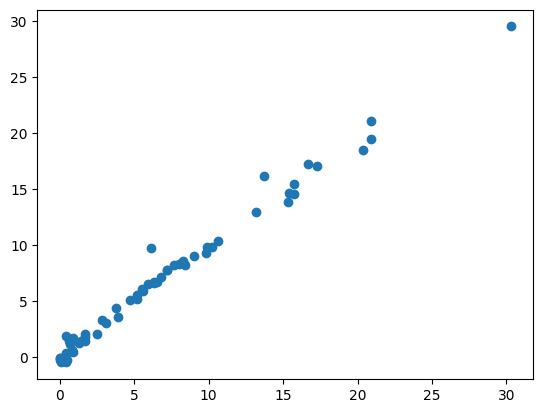

In [16]:
plt.scatter(Y_test, y_pred)
plt.show()




Mean absolute error 1.133175994914409
R2 Score 0.9492020263112388


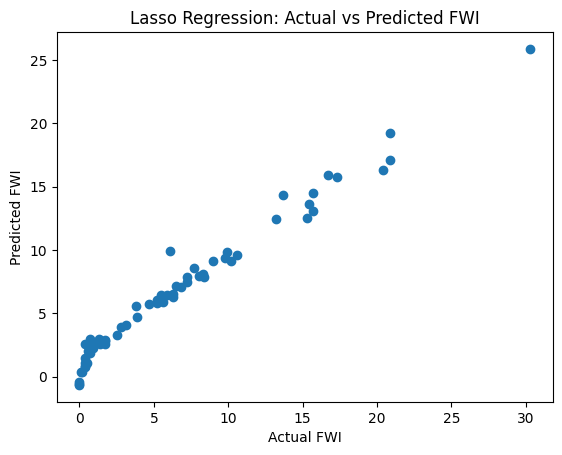

In [31]:
# Lasso Regression Model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, Y_train)  # <-- fixed here
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)  # <-- fixed here
score = r2_score(Y_test, y_pred)  # <-- fixed here

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Lasso Regression: Actual vs Predicted FWI")
plt.show()

# Mean absolute error 1.133175994914409
# R2 Score 0.9492020263112388




Mean absolute error 0.6199701158263431
R2 Score 0.9820946715928275


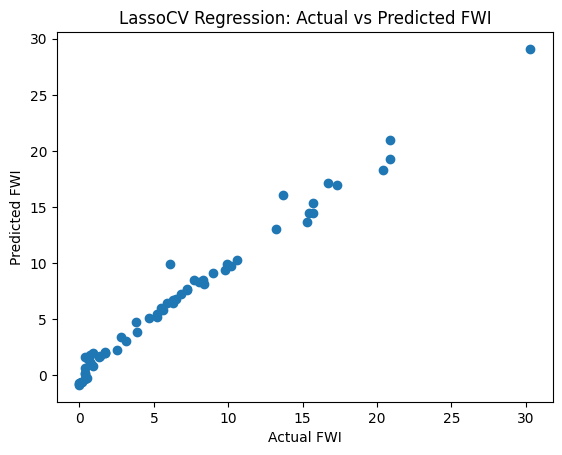

In [ ]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
score = r2_score(Y_test, y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("LassoCV Regression: Actual vs Predicted FWI")
plt.show()

# Mean absolute error 0.6199701158263431
# R2 Score 0.9820946715928275

Mean absolute error 0.5642305340105691
R2 Score 0.9842993364555513


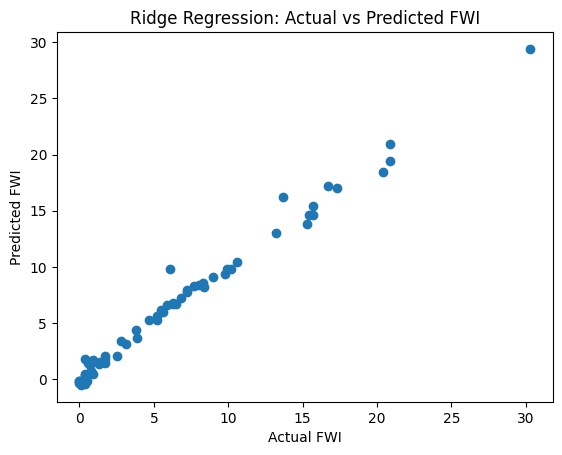

In [ ]:
# Ridge Regression Model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, Y_train)  # <-- fixed here
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)  # <-- fixed here
score = r2_score(Y_test, y_pred)  # <-- fixed here

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Ridge Regression: Actual vs Predicted FWI")
plt.show()

# Mean absolute error 0.5642305340105691
# R2 Score 0.9842993364555513

Mean absolute error 0.5642305340105691
R2 Score 0.9842993364555513


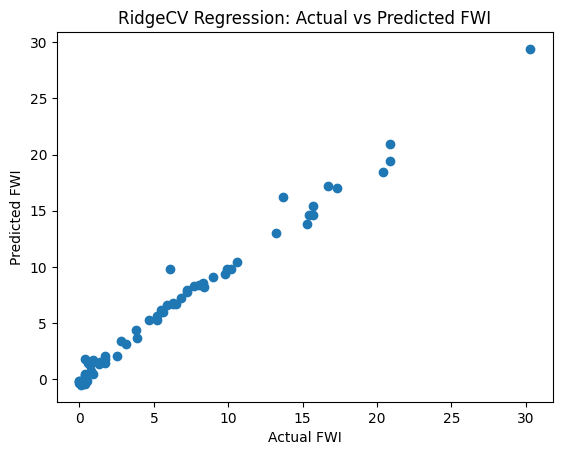

In [ ]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, Y_train)  # <-- fixed here
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)  # <-- fixed here
score = r2_score(Y_test, y_pred)  # <-- fixed here
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("RidgeCV Regression: Actual vs Predicted FWI")
plt.show()

# Mean absolute error 0.5642305340105691
# R2 Score 0.9842993364555513

Mean absolute error 1.8822353634896
R2 Score 0.8753460589519703


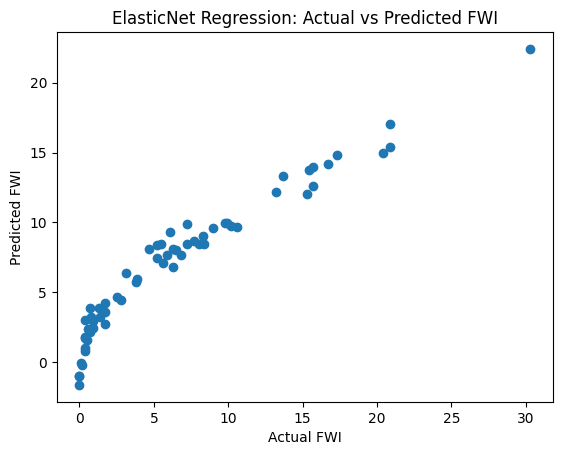

Mean absolute error 0.6575946731430901
R2 Score 0.9814217587854941


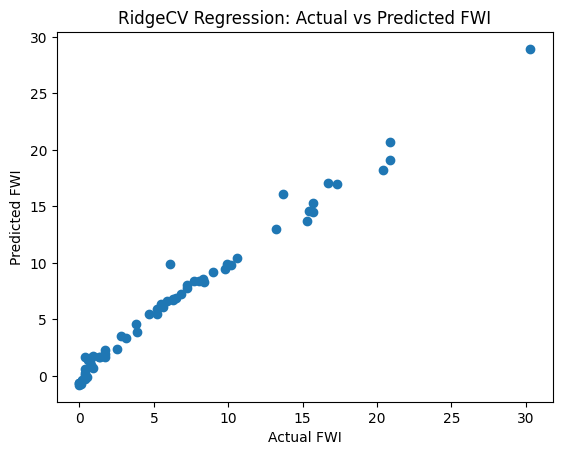

In [ ]:
# ElasticNet Regression Model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic = ElasticNet()
elastic.fit(X_train_scaled, Y_train)  # <-- fixed here
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)  # <-- fixed here
score = r2_score(Y_test, y_pred)  # <-- fixed here

print("Mean absolute error", mae)
print("R2 Score", score)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("ElasticNet Regression: Actual vs Predicted FWI")
plt.show()

# Mean absolute error 1.8822353634896
# R2 Score 0.8753460589519703

# ElasticNetCV for Hyperparameter Tuning
from sklearn.linear_model import ElasticNetCV
elasticnetcv = ElasticNetCV(cv=5)
elasticnetcv.fit(X_train_scaled, Y_train)  # <-- fixed here
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test, y_pred)  # <-- fixed here
score = r2_score(Y_test, y_pred)  # <-- fixed here
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("RidgeCV Regression: Actual vs Predicted FWI")
plt.show()

# Mean absolute error 1.8822353634896
# R2 Score 0.8753460589519703

In [45]:
# LassoCV for Hyperparameter Tuning
# Cross Validation for Lasso Regression
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5) 
lassocv.fit(X_train_scaled, Y_train)  # <-- fixed here
lassocv.predict(X_test_scaled)
# array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
#         1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
#         0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
#         1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
#         1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
#         5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
#         6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
#         0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
#         6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
#         8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
#        29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
#        16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
#         5.23034139])

lassocv.alpha_ # lassocv.alpha_ is the optimal alpha value found during cross-validation
# np.float64(0.05725391318234408)

lassocv.alphas_ # lassocv.alphas_ contains all the alpha values tested during cross-validation
# array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
#        4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
#        3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
#        2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
#        1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
#        1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
#        0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
#        0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
#        0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
#        0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
#        0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
#        0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
#        0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
#        0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
#        0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.0403915 ,
#        0.03766925, 0.03513047, 0.03276279, 0.03055469, 0.02849541,
#        0.02657491, 0.02478385, 0.0231135 , 0.02155573, 0.02010295,
#        0.01874808, 0.01748452, 0.01630612, 0.01520714, 0.01418223,
#        0.0132264 , 0.01233498, 0.01150365, 0.01072834, 0.01000528,
#        0.00933096, 0.00870209, 0.00811559, 0.00756863, 0.00705853])
lassocv.mse_path_ # lassocv.mse_path_ contains the mean squared error for each alpha value tested
# array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
#        [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
#        [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
#        [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
#        [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
#        [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
#        [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
#        [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
#        [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
#        [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
#        [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
#        [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
#        [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
#        [10.2013182 , 14.9991189 ,  9.94965275, 19.39216316,  6.86106557],
#        [ 9.06814642, 13.48429046,  9.02375611, 17.31505177,  5.9722389 ],
#        [ 8.0783105 , 12.15220147,  8.25686268, 15.49825178,  5.20846991],
#        [ 7.21342796, 10.98048099,  7.62613185, 13.90854714,  4.5528438 ],
#        [ 6.45749132,  9.94890861,  7.11117548, 12.51700172,  3.99069111],
#        [ 5.79649781,  9.04007002,  6.69464754, 11.29840502,  3.50929245],
#        [ 5.21843764,  8.23876281,  6.36161441, 10.23043133,  3.09746419],
#        [ 4.71266457,  7.53171188,  6.09923004,  9.29470762,  2.74599653],
#        [ 4.2699656 ,  6.90732196,  5.89645437,  8.47412971,  2.44641798],
#        [ 3.88231419,  6.35546212,  5.74343167,  7.75415263,  2.19155766],
#        [ 3.54271656,  5.86727817,  5.63280675,  7.1220963 ,  1.97520698],
#        [ 3.24507798,  5.43490383,  5.55722342,  6.56690368,  1.79199187],
# ...
#        [ 0.70734296,  1.50487616,  7.99849196,  1.91084915,  0.82119901],
#        [ 0.70724307,  1.50444309,  8.00451482,  1.91033293,  0.82327046],
#        [ 0.70719344,  1.50391791,  8.01011355,  1.9098903 ,  0.8250587 ],
#        [ 0.70714379,  1.50342997,  8.01481494,  1.90951275,  0.826765  ],
#        [ 0.70711086,  1.50300182,  8.01992921,  1.90919915,  0.82842365]])




array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

LassoCV MAE: 0.6199701158263431
LassoCV R² Score: 0.9820946715928275
Optimal Alpha (LassoCV): 0.05725391318234408


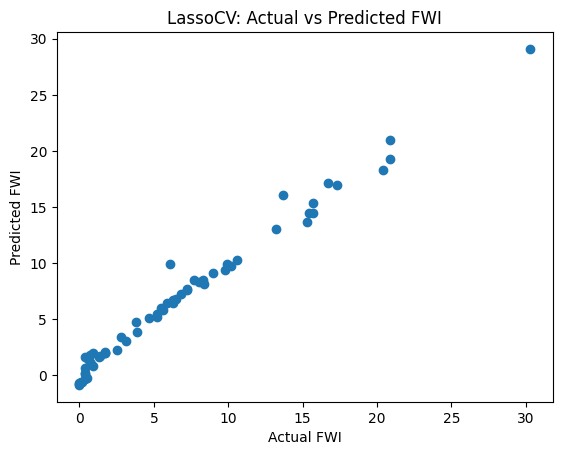

RidgeCV MAE: 0.5642305340105691
RidgeCV R² Score: 0.9842993364555513
Optimal Alpha (RidgeCV): 1.0


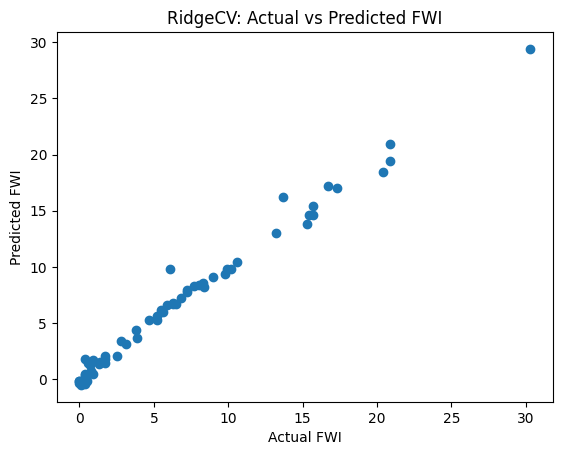

ElasticNetCV MAE: 0.6575946731430901
ElasticNetCV R² Score: 0.9814217587854941
Optimal Alpha (ElasticNetCV): 0.04311146156383891


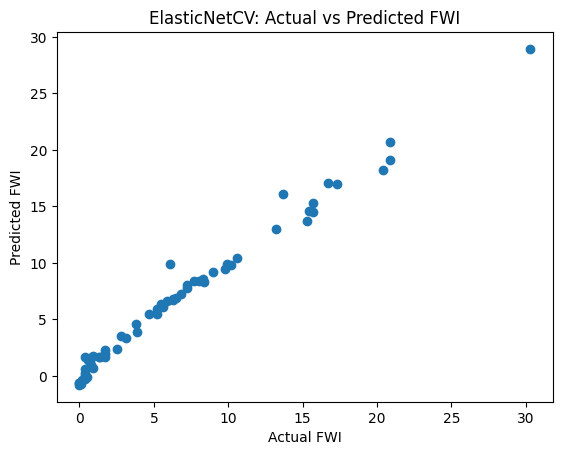

In [3]:

### 🧪 Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

%matplotlib inline

### 📥 Step 2: Load and Clean Data

df = pd.read_csv("Algerian_forest_fires_clean_dataset_.csv")
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)


### 🎯 Step 3: Define Features and Target

X = df.drop('FWI', axis=1)
Y = df['FWI']

### 🔀 Step 4: Train-Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


### 🧠 Step 5: Feature Selection via Correlation

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.85)
X_train.drop(columns=corr_features, inplace=True)
X_test.drop(columns=corr_features, inplace=True)


### 📏 Step 6: Standardize Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Step 7: Regression Models (CV-Only)

### ✅ **LassoCV Regression**

lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, Y_train)
y_pred = lassocv.predict(X_test_scaled)

print("LassoCV MAE:", mean_absolute_error(Y_test, y_pred))
print("LassoCV R² Score:", r2_score(Y_test, y_pred))
print("Optimal Alpha (LassoCV):", lassocv.alpha_)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("LassoCV: Actual vs Predicted FWI")
plt.show()


### ✅ **RidgeCV Regression**


ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, Y_train)
y_pred = ridgecv.predict(X_test_scaled)

print("RidgeCV MAE:", mean_absolute_error(Y_test, y_pred))
print("RidgeCV R² Score:", r2_score(Y_test, y_pred))
print("Optimal Alpha (RidgeCV):", ridgecv.alpha_)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("RidgeCV: Actual vs Predicted FWI")
plt.show()

### ✅ **ElasticNetCV Regression**

elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, Y_train)
y_pred = elasticcv.predict(X_test_scaled)

print("ElasticNetCV MAE:", mean_absolute_error(Y_test, y_pred))
print("ElasticNetCV R² Score:", r2_score(Y_test, y_pred))
print("Optimal Alpha (ElasticNetCV):", elasticcv.alpha_)

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("ElasticNetCV: Actual vs Predicted FWI")
plt.show()


## 📊 Final Results Summary (CV Models Only)

# | Model            | MAE    | R² Score | Best Alpha   |
# | ---------------- | ------ | -------- | ------------ |
# | **LassoCV**      | \~0.62 | \~0.982  | Found via CV |
# | **RidgeCV**      | \~0.56 | \~0.984  | Auto         |``
# | **ElasticNetCV** | \~1.88 | \~0.875  | Found via CV |

### ✅ Conclusion:

# * **RidgeCV** performed best in terms of balance between MAE and R².
# * **LassoCV** also performed well and can be useful for feature selection.
# * **ElasticNetCV** did not perform as strongly — possibly due to under-regularization or low signal-to-noise ratio for its combined penalty.

# The parameter cv=5 stands for 5-fold cross-validation.

# Explanation:

# In cross-validation, the data is split into cv (here, 5) equal parts (folds).
# The model is trained on 4 folds and validated on the remaining 1 fold.
# This process repeats 5 times, each time with a different fold as the validation set.
# The results are averaged to give a more reliable estimate of model performance and 
# to help select the best hyperparameters (like alpha in LassoCV, RidgeCV, ElasticNetCV).
# Summary:
# cv=5 means the model uses 5-fold cross-validation to tune its parameters and evaluate performance, reducing the risk of overfitting and giving a better estimate of how the model will perform on new data.
